# Task 2: classifying clothes (3 points)

In [89]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F 
import torch
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                               ])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

[['Shirt' 'T-shirt/top' 'Sandal' 'Coat' 'Coat' 'Shirt' 'Shirt' 'Coat']
 ['Shirt' 'Pullover' 'Pullover' 'Trouser' 'Pullover' 'Coat' 'Ankle boot'
  'Bag']
 ['Sneaker' 'Shirt' 'Sandal' 'Pullover' 'Trouser' 'Trouser' 'Sandal'
  'Dress']
 ['Trouser' 'Pullover' 'Sneaker' 'Dress' 'Dress' 'Ankle boot' 'Bag'
  'Trouser']
 ['Dress' 'T-shirt/top' 'Sneaker' 'Shirt' 'Bag' 'Ankle boot' 'Pullover'
  'Sandal']
 ['Ankle boot' 'Bag' 'Sandal' 'Pullover' 'Dress' 'Bag' 'Coat' 'Trouser']
 ['Ankle boot' 'Dress' 'Sneaker' 'T-shirt/top' 'Ankle boot' 'Sandal'
  'Shirt' 'Sneaker']
 ['Pullover' 'Pullover' 'Shirt' 'Trouser' 'Pullover' 'Bag' 'Sneaker'
  'Trouser']]


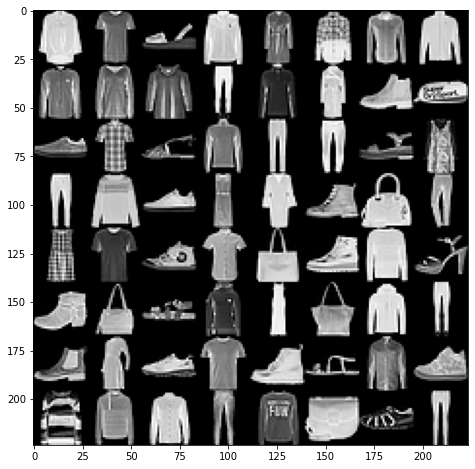

In [45]:
# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 64 images
sample_images, sample_labels = next(iter(trainloader))

# Plot the images in a 8x8 grid
plt.figure(figsize=(8, 8))
plt.imshow(
    sample_images.numpy().reshape(8, 8, 28, 28).transpose((0, 2, 1, 3)).reshape(224, 224),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(8, 8)])

In [90]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

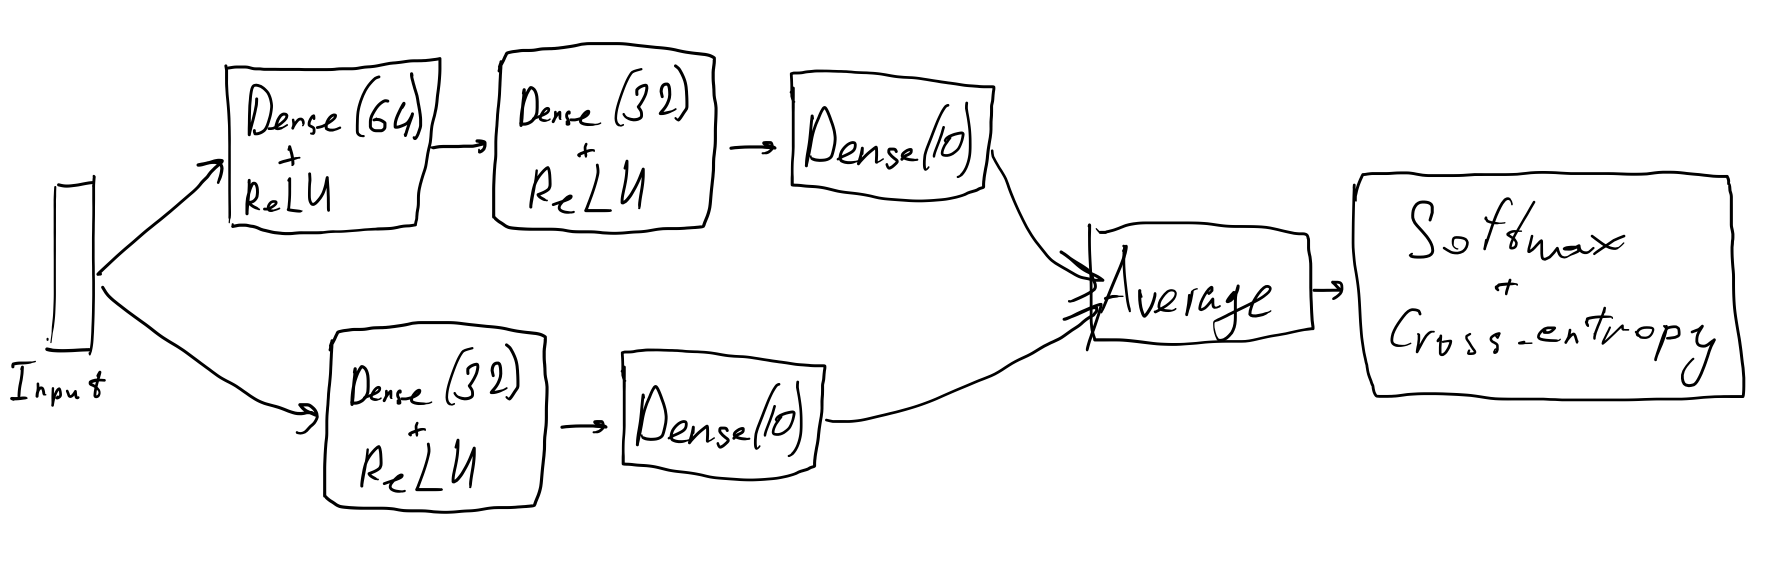

In [91]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.stack_1 = nn.Sequential(
                        nn.Linear(28*28, 64),
                        nn.ReLU(),
                        nn.Linear(64,32),
                        nn.ReLU(),
                        nn.Linear(32,10)
        )
        self.stack_2 = nn.Sequential(
                        nn.Linear(28*28, 32),
                        nn.ReLU(),
                        nn.Linear(32,10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits_1 = self.stack_1(x)
        logits_2 = self.stack_2(x)
        return torch.mean(torch.stack([logits_1, logits_2]), dim=0)

In [92]:
model = NeuralNetwork().to(my_device)

In [93]:
learning_rate = 1e-3
batch_size = 10
epochs = 5

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [99]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        y_pred = model(X)
        loss = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [100]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [101]:
epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, criterion, optimizer)
    test_loop(testloader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.158486  [    0/60000]
loss: 2.159188  [ 6400/60000]
loss: 2.112727  [12800/60000]
loss: 2.037514  [19200/60000]
loss: 1.997145  [25600/60000]
loss: 1.987800  [32000/60000]
loss: 1.875803  [38400/60000]
loss: 1.914343  [44800/60000]
loss: 1.839426  [51200/60000]
loss: 1.737937  [57600/60000]
Test Error: 
 Accuracy: 50.4%, Avg loss: 1.761688 

Epoch 2
-------------------------------
loss: 1.692681  [    0/60000]
loss: 1.825431  [ 6400/60000]
loss: 1.642928  [12800/60000]
loss: 1.734164  [19200/60000]
loss: 1.680968  [25600/60000]
loss: 1.598618  [32000/60000]
loss: 1.478683  [38400/60000]
loss: 1.414566  [44800/60000]
loss: 1.538465  [51200/60000]
loss: 1.264856  [57600/60000]
Test Error: 
 Accuracy: 65.2%, Avg loss: 1.382710 

Done!
